# Exploratory Data Analysis (EDA)

## Dataset: Student Course Completion Prediction
This notebook performs a comprehensive EDA to understand the data, identify patterns, and prepare for modeling.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration
sns.set_style("whitegrid")
pd.set_option('display.max_columns', None)

## 1. Data Loading and Overview

In [2]:
file_path = "../data/raw/Course_Completion_Prediction.csv"
df = pd.read_csv(file_path)
# on garde que les categorie = a programming
df = df[df['Category'] == 'Programming']
print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (56172, 40)


,Student_ID,Name,Gender,Age,Education_Level,Employment_Status,City,Device_Type,Internet_Connection_Quality,Course_ID,Course_Name,Category,Course_Level,Course_Duration_Days,Instructor_Rating,Login_Frequency,Average_Session_Duration_Min,Video_Completion_Rate,Discussion_Participation,Time_Spent_Hours,Days_Since_Last_Login,Notifications_Checked,Peer_Interaction_Score,Assignments_Submitted,Assignments_Missed,Quiz_Attempts,Quiz_Score_Avg,Project_Grade,Progress_Percentage,Rewatch_Count,Enrollment_Date,Payment_Mode,Fee_Paid,Discount_Used,Payment_Amount,App_Usage_Percentage,Reminder_Emails_Clicked,Support_Tickets_Raised,Satisfaction_Rating,Completed
0,STU100000,Vihaan Patel,Male,19,Diploma,Student,Indore,Laptop,Medium,C102,Data Analysis with Python,Programming,Intermediate,60,4.7,3,30,55.0,2,0.5,1,6,4.3,8,1,5,80.9,71.2,70.8,0,01-06-2024,Scholarship,No,No,1740,49,3,4,3.5,Completed
1,STU100001,Arjun Nair,Female,17,Bachelor,Student,Delhi,Laptop,Low,C106,Machine Learning A-Z,Programming,Advanced,90,4.6,4,37,84.1,2,0.9,3,5,7.8,4,6,3,78.4,42.5,55.6,2,27-04-2025,Credit Card,Yes,No,6147,86,0,0,4.5,Not Completed
2,STU100002,Aditya Bhardwaj,Female,34,Master,Student,Chennai,Mobile,Medium,C101,Python Basics,Programming,Beginner,45,4.6,5,9,75.6,3,0.5,19,5,6.7,8,2,3,100.0,87.9,78.8,2,20-01-2024,NetBanking,Yes,No,4280,85,1,0,5.0,Completed
4,STU100004,Krishna Nair,Female,19,Master,Self-Employed,Lucknow,Laptop,Medium,C106,Machine Learning A-Z,Programming,Advanced,90,4.6,2,36,86.4,1,0.5,4,7,7.5,5,5,8,84.8,93.0,64.9,4,19-12-2024,Debit Card,Yes,Yes,5486,91,3,0,4.0,Completed
5,STU100005,Rohan Reddy,Female,21,Bachelor,Student,Jaipur,Mobile,Medium,C102,Data Analysis with Python,Programming,Intermediate,60,4.7,7,30,85.9,1,11.8,4,9,6.2,7,3,4,99.6,65.6,75.3,5,23-10-2023,UPI,Yes,No,4526,74,5,2,4.5,Completed


### Feature Descriptions

| Feature | Description |
| :--- | :--- |
| Student_ID | Unique identifier for the student. |
| Name | Full name of the student. |
| Gender | Gender of the student (e.g., Male, Female, Others). |
| Age | Age of the student in years. |
| Education_Level | Highest level of education attained by the student. |
| Employment_Status | Current employment status of the student (e.g., Student, Employed). |
| City | City where the student resides. |
| Device_Type | Type of device used to access the course (e.g., Laptop, Mobile). |
| Internet_Connection_Quality | Quality of the student's internet connection (e.g., Low, Medium, High). |
| Course_ID | Unique identifier for the course. |
| Course_Name | Full name of the course. |
| Category | Subject category of the course (e.g., Programming, Design). |
| Course_Level | Difficulty level of the course (e.g., Beginner, Advanced). |
| Course_Duration_Days | Total intended duration of the course in days. |
| Instructor_Rating | Average rating given to the course instructor (e.g., 1.0 to 5.0). |
| Login_Frequency | Number of times the student logs in per a defined period (e.g., per week). |
| Average_Session_Duration_Min | Average time (in minutes) spent per login session. |
| Video_Completion_Rate | Percentage of course video content watched by the student. |
| Discussion_Participation | Count of the student's participation in discussion forums. |
| Time_Spent_Hours | Total number of hours spent actively engaging with the course content. |
| Days_Since_Last_Login | Number of days passed since the student's most recent login. |
| Notifications_Checked | Count of how many times the student checked their notifications. |
| Peer_Interaction_Score | A score representing the quality or quantity of interaction with peers. |
| Assignments_Submitted | Total count of assignments successfully submitted by the student. |
| Assignments_Missed | Total count of assignments missed or not submitted by the student. |
| Quiz_Attempts | Total number of attempts made across all course quizzes. |
| Quiz_Score_Avg | Average score (percentage) across all quizzes taken by the student. |
| Project_Grade | The final grade received on the course project (e.g., 0 to 100). |
| Progress_Percentage | Overall completion progress in the course (0 to 100). |
| Rewatch_Count | Total number of times the student rewatched course video content. |
| Enrollment_Date | Date when the student initially enrolled in the course. |
| Payment_Mode | Method used for course fee payment (e.g., Credit Card, Scholarship). |
| Fee_Paid | Binary indicator: whether the course fee was paid ('Yes'/'No'). |
| Discount_Used | Binary indicator: whether a discount or coupon was applied ('Yes'/'No'). |
| Payment_Amount | The final amount paid by the student for the course. |
| App_Usage_Percentage | Percentage of course activity conducted via the mobile application. |
| Reminder_Emails_Clicked | Number of course reminder emails the student clicked open. |
| Support_Tickets_Raised | Total number of support or help tickets raised by the student. |
| Satisfaction_Rating | Overall satisfaction rating given by the student (e.g., 1.0 to 5.0). |
| Completed | Target Variable: Binary indicator if the student completed the course. |

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56172 entries, 0 to 99994
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    56172 non-null  object 
 1   Name                          56172 non-null  object 
 2   Gender                        56172 non-null  object 
 3   Age                           56172 non-null  int64  
 4   Education_Level               56172 non-null  object 
 5   Employment_Status             56172 non-null  object 
 6   City                          56172 non-null  object 
 7   Device_Type                   56172 non-null  object 
 8   Internet_Connection_Quality   56172 non-null  object 
 9   Course_ID                     56172 non-null  object 
 10  Course_Name                   56172 non-null  object 
 11  Category                      56172 non-null  object 
 12  Course_Level                  56172 non-null  object 
 13  Course

In [4]:
df[["Quiz_Score_Avg", "Project_Grade"]].corr()

,Quiz_Score_Avg,Project_Grade
Quiz_Score_Avg,1.000000,0.094881
Project_Grade,0.094881,1.000000


In [5]:
df.describe()

,Age,Course_Duration_Days,Instructor_Rating,Login_Frequency,Average_Session_Duration_Min,Video_Completion_Rate,Discussion_Participation,Time_Spent_Hours,Days_Since_Last_Login,Notifications_Checked,Peer_Interaction_Score,Assignments_Submitted,Assignments_Missed,Quiz_Attempts,Quiz_Score_Avg,Project_Grade,Progress_Percentage,Rewatch_Count,Payment_Amount,App_Usage_Percentage,Reminder_Emails_Clicked,Support_Tickets_Raised,Satisfaction_Rating
count,56172.0000,56172.000000,56172.000000,56172.000000,56172.000000,56172.000000,56172.000000,56172.000000,56172.000000,56172.000000,56172.000000,56172.000000,56172.000000,56172.000000,56172.000000,56172.000000,56172.000000,56172.000000,56172.000000,56172.000000,56172.000000,56172.000000,56172.000000
mean,25.6894,64.884373,4.604919,4.786513,33.893185,62.178911,2.335630,3.872823,6.178078,5.233462,6.291344,4.780335,5.120754,3.774567,73.324279,68.182956,53.853735,2.318112,3719.149932,67.917753,2.333405,0.868030,4.134241
std,5.6114,16.545829,0.070642,1.841602,10.359332,19.541408,1.599519,3.764176,6.962423,2.400613,1.980085,1.661907,1.689705,2.020574,12.535883,15.337843,12.479864,1.579895,2283.482047,19.128881,1.585628,0.945928,0.700329
min,17.0000,45.000000,4.500000,0.000000,5.000000,5.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.800000,0.000000,8.100000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,21.0000,45.000000,4.600000,3.000000,27.000000,48.500000,1.000000,0.500000,1.000000,4.000000,4.900000,4.000000,4.000000,2.000000,64.800000,57.800000,45.300000,1.000000,1468.000000,55.000000,1.000000,0.000000,3.700000
50%,25.0000,60.000000,4.600000,5.000000,34.000000,64.000000,2.000000,2.700000,4.000000,5.000000,6.300000,5.000000,5.000000,4.000000,73.400000,68.300000,53.900000,2.000000,4466.000000,68.000000,2.000000,1.000000,4.200000
75%,30.0000,75.000000,4.700000,6.000000,41.000000,77.500000,3.000000,6.200000,9.000000,7.000000,7.700000,6.000000,6.000000,5.000000,82.000000,78.800000,62.400000,3.000000,5392.000000,82.000000,3.000000,1.000000,4.700000
max,52.0000,90.000000,4.700000,15.000000,76.000000,99.900000,11.000000,25.600000,99.000000,18.000000,10.000000,10.000000,10.000000,16.000000,100.000000,100.000000,98.600000,15.000000,7149.000000,100.000000,13.000000,8.000000,5.000000


## 2. Data Cleaning & Preprocessing
*   Check for missing values
*   Check for duplicates
*   Convert dates
*   Drop irrelevant columns

In [6]:
df.isnull().sum()

Student_ID                      0
Name                            0
Gender                          0
Age                             0
Education_Level                 0
Employment_Status               0
City                            0
Device_Type                     0
Internet_Connection_Quality     0
Course_ID                       0
Course_Name                     0
Category                        0
Course_Level                    0
Course_Duration_Days            0
Instructor_Rating               0
Login_Frequency                 0
Average_Session_Duration_Min    0
Video_Completion_Rate           0
Discussion_Participation        0
Time_Spent_Hours                0
Days_Since_Last_Login           0
Notifications_Checked           0
Peer_Interaction_Score          0
Assignments_Submitted           0
Assignments_Missed              0
Quiz_Attempts                   0
Quiz_Score_Avg                  0
Project_Grade                   0
Progress_Percentage             0
Rewatch_Count 

> Aucune valeur nulle

In [7]:
# Duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")


Duplicate Rows: 0


> Aucune ligne dupliquée

### Split des deux datasets (Classification et Regression)

In [12]:
# DF REGRESSION
df_regression = df.drop(columns=["Course_ID", "Student_ID", "Category", "Name", "Enrollment_Date", "Quiz_Attempts", "Completed"])
df_regression.head()

# split X y regression
X_reg = df_regression.drop(columns=["Quiz_Score_Avg","Project_Grade","Satisfaction_Rating","Time_Spent_Hours"])
y_reg = df_regression[["Quiz_Score_Avg","Project_Grade","Satisfaction_Rating","Time_Spent_Hours"]]

print(X_reg.shape)
print(y_reg.shape)

(56172, 29)
(56172, 4)


In [14]:
# DF CLASIFICATION
df_clasification = df.drop(columns=["Course_ID", "Student_ID", "Category", "Name", "Enrollment_Date", "Quiz_Score_Avg", "Project_Grade"])
df_clasification.head()

# split X y classification
X_class = df_clasification.drop(columns=["Completed"])
y_class = df_clasification["Completed"]

print(X_class.shape)
print(y_class.shape)

(56172, 32)
(56172,)


## 3. Univariate Analysis

In [15]:
# trouver les features numérique et catégorielle
numerical_cols = []
categorical_cols = []
for col in X_class.columns:
    if X_class[col].dtype == 'object':
        categorical_cols.append(col)
    else:
        numerical_cols.append(col)
print(numerical_cols)
print(categorical_cols)

['Age', 'Course_Duration_Days', 'Instructor_Rating', 'Login_Frequency', 'Average_Session_Duration_Min', 'Video_Completion_Rate', 'Discussion_Participation', 'Time_Spent_Hours', 'Days_Since_Last_Login', 'Notifications_Checked', 'Peer_Interaction_Score', 'Assignments_Submitted', 'Assignments_Missed', 'Quiz_Attempts', 'Progress_Percentage', 'Rewatch_Count', 'Payment_Amount', 'App_Usage_Percentage', 'Reminder_Emails_Clicked', 'Support_Tickets_Raised', 'Satisfaction_Rating']
['Gender', 'Education_Level', 'Employment_Status', 'City', 'Device_Type', 'Internet_Connection_Quality', 'Course_Name', 'Course_Level', 'Payment_Mode', 'Fee_Paid', 'Discount_Used']


### 3.2 Numerical Features

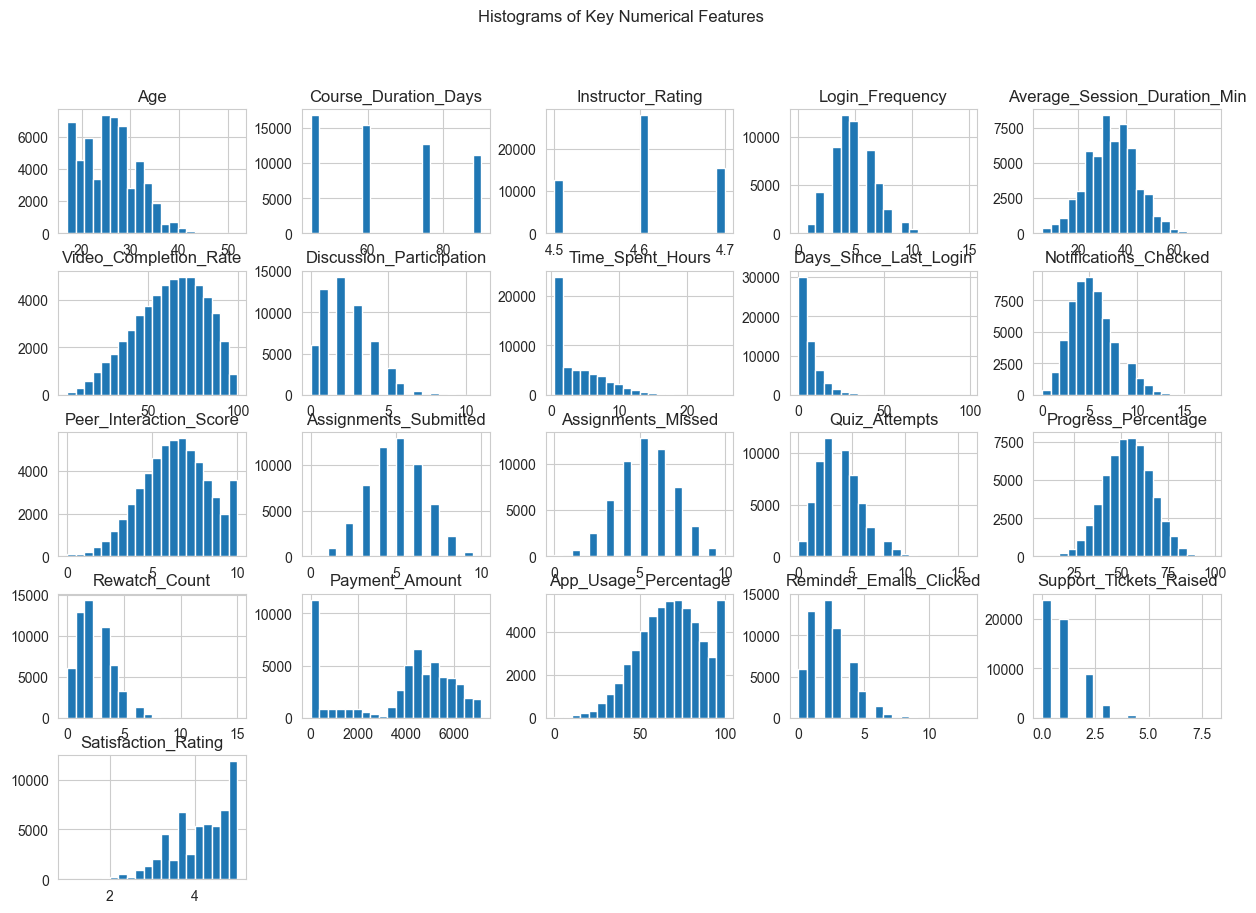

In [17]:
X_class[numerical_cols].hist(bins=20, figsize=(15, 10), layout=(5, 5))
plt.suptitle('Histograms of Key Numerical Features')
plt.show()

### 3.3 Categorical Features

TypeError: Data source must be a DataFrame or Mapping, not <class 'numpy.ndarray'>.

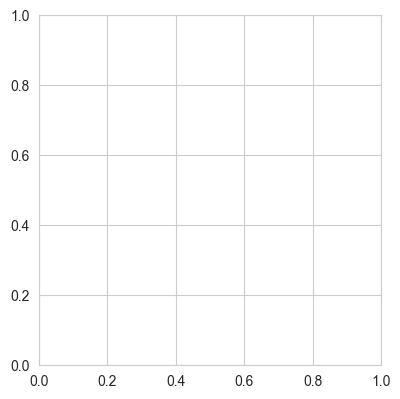

In [22]:
from pandas import get_dummies
from sklearn.preprocessing import LabelEncoder

# features categorielle one hot encoding
categorical_label_encode  = [ 'Education_Level', 'Course_Level', 'Internet_Connection_Quality']
categorical_one_hot_encode = ['Gender', 'Device_Type','Employment_Status','City','Payment_Mode', 'Fee_Paid', 'Discount_Used','Course_Name']

df_clasification = get_dummies(categorical_one_hot_encode)
df_clasification = LabelEncoder().fit_transform(categorical_label_encode)

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, data=df_clasification, palette='pastel')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4. Bivariate Analysis (Relation to Target)

### 4.1 Numerical Features vs Target

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Completed', y=col, data=df_clean, palette='Set2')
    plt.title(f'{col} by Completion Status')
plt.tight_layout()
plt.show()

### 4.2 Categorical Features vs Target

In [ ]:
def plot_completion_rate(col):
    plt.figure(figsize=(8, 5))
    prop_df = df_clean.groupby([col])['Completed'].value_counts(normalize=True).unstack()
    prop_df.plot(kind='bar', stacked=True, color=['#ff9999','#66b3ff'])
    plt.title(f'Completion Rate by {col}')
    plt.ylabel('Proportion')
    plt.legend(title='Completed', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

plot_completion_rate('Education_Level')
plot_completion_rate('Employment_Status')

## 5. Correlation Analysis

In [ ]:
# Select only numeric columns for correlation
numeric_df = df_clean.select_dtypes(include=[np.number])

plt.figure(figsize=(16, 12))
corr = numeric_df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Top correlations with a specific feature (e.g., Progress_Percentage) if relevant
print("Top correlations with Progress_Percentage:")
print(corr['Progress_Percentage'].sort_values(ascending=False).head(10))

## 6. Conclusion
Summary of key observations from the EDA:
*   **Target Balance**: [Observe if the dataset is balanced or imbalanced]
*   **Key Drivers**: [Identify features that seem to separate Completed vs Not Completed well, e.g., Progress, Quiz Scores]
*   **Data Quality**: [Note on missing values or clean data]
*   **Next Steps**: Feature engineering, encoding categorical variables, and model selection.